Sources:

https://github.com/Coding-Crashkurse/RAG-Evaluation-with-Ragas/blob/main/ragas.ipynb
https://www.youtube.com/watch?v=aeae-sITqEA

In [3]:
!pip install langchain langchain-community


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Youtube Link:
https://www.youtube.com/watch?v=aeae-sITqEA

In [1]:
# SIMULATING THE APP HERE, ONLY FOR 1 DOCUMENT
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
data_path = "Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis.pdf"

print("Loading PDF...")
loader = PyPDFLoader(data_path)
pages = loader.load()

for page in pages:
  page.metadata['file_name'] = page.metadata['source']

print(f"PDF loaded: {data_path}...")

print("Splitting text...")
# Initialize the RecursiveCharacterTextSplitter for splitting text
# predefined length -- how many chars do we want per chunk
# overlap - character 0 - 1000, first document. Then, there's an overlap of +-150 characters between doc 1 and doc 2
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=1000, chunk_overlap=50)
chunked_documents = text_splitter.split_documents(pages)

print('Length of chunks:', len(chunked_documents))

Loading PDF...
PDF loaded: Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis.pdf...
Splitting text...
Length of chunks: 34


In [4]:
import os
from dotenv import load_dotenv
load_dotenv()
openai_api_key=os.environ["OPENAI_API_KEY"]
print("done")

done


In [6]:
# "gpt-4-1106-preview"
GPT_MODEL = "gpt-3.5-turbo-0125"
CRITIC_MODEL = "gpt-4-turbo"
EMBEDDING_MODEL = "text-embedding-ada-002"

In [4]:
chunked_documents

[Document(page_content='Aspect Detection and Sentim ent Classification using Deep Neural Network for \nIndonesian Aspect-Based Sentiment Analysis\nArfinda Ilmania \nProsa Solusi Cerdas \nBandung, Indonesia \narfinda.ilmania@prosa.ai \n \nSamuel Cahyawijaya \nProsa Solusi Cerdas  \nBandung, Indonesia \nsamuel.cahyawijaya@prosa.ai Abdurrahman \nProsa Solusi Cerdas  \nBandung, Indonesia \nabdurrahman.prasetyo@prosa.ai \n \nAyu Purwarianti \nInstitut Teknologi Bandung  \nBandung, Indonesia \nayu@stei.itb.ac.id\nAbstract —Sentiment analysis can categorize an overall \nopinion from a sentence or a document. However, there are sentences with more than one opinion in a single sentence \nstatement. This problem is solved by aspect-based sentiment \nanalysis. We conduct experiments on this problem using Indonesian dataset with 2-step process: aspect detection and sentiment classification. On aspect detection, we compare \ntwo deep neural network models with different input vector', metadata={'so

In [5]:

from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

generator = TestsetGenerator.with_openai()

generator_llm = "gpt-3.5-turbo-0125" #being used in the app
# critic_llm = "gpt-4-turbo" #to be used by the evaluator
critic_llm = "gpt-3.5-turbo-0125" #to be used by the evaluator
embeddings = "text-embedding-ada-002" #being used in the app

generator = TestsetGenerator.with_openai(
    generator_llm,
    critic_llm,
    embeddings
)

# Test sets are 20% simple, 45% are reasoning, and 35% to be multi_context
distributions = {
    simple: 0.20,
    reasoning: 0.45,
    multi_context: 0.35
}

total_weight = sum(distributions.values())
if total_weight == 1:
    print("Distribution is valid.")
else:
    print(f"Total weight is {total_weight}, which does not equal 1. Please adjust your distribution.")

# generate testset
testset = generator.generate_with_langchain_docs(chunked_documents, test_size=15, distributions=distributions)

c:\Users\louis\Desktop\ay2023-2024-1st-sem-cmsc190-sp1-ridiculoys\code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\louis\AppData\Local\Temp\ipykernel_19648\113891055.py:4: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai()
C:\Users\louis\AppData\Local\Temp\ipykernel_19648\113891055.py:11: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai(


Distribution is valid.


Filename and doc_id are the same for all nodes.                 
Generating: 100%|██████████| 10/10 [02:08<00:00, 12.82s/it]


In [9]:
testset.to_pandas()

,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,How does the CNN-based model struggle to class...,"[product is okay, delivery time and process of...",The CNN-based model struggles to classify sent...,simple,[{'source': 'Aspect Detection and Sentiment Cl...,True
1,How does the approach of using predefined aspe...,[a sentence is predicted not having a certain ...,The approach of using predefined aspects diffe...,simple,[{'source': 'Aspect Detection and Sentiment Cl...,True
2,How does the F1-score of the GRU baseline comp...,[to GRU baseline because GRU baseline has adva...,The F1-score of the GRU baseline in the aspect...,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
3,How does aspect matrix improve CNN sentiment c...,[target aspect well according to some words wh...,nan,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
4,What unique method was used for Indonesian asp...,"[known so far, deep learning-based approach ha...",A deep learning-based approach was used for In...,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
5,How does aspect-based sentiment analysis in th...,[detection; sentiment classification; Indonesi...,Aspect-based sentiment analysis in the Indones...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
6,How do the two sentiment classification approa...,[a sentence is predicted not having a certain ...,The two sentiment classification approaches di...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
7,How does aspect matrix improve CNN sentiment c...,[target aspect well according to some words wh...,nan,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
8,How is the sentiment lexicon used in the senti...,[(similar approach with Do [13]) which consist...,The sentiment lexicon is translated by Wahid a...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True


In [5]:
testset.to_pandas().to_csv('testset.csv', index=False)

NameError: name 'testset' is not defined

In [1]:
import pandas as pd

testset = pd.read_csv("testset.csv")

In [2]:
testset

,question,contexts,ground_truth,evolution_type,metadata,episode_done
0,How does the CNN-based model struggle to class...,"['product is okay, delivery time and process o...",The CNN-based model struggles to classify sent...,simple,[{'source': 'Aspect Detection and Sentiment Cl...,True
1,How does the approach of using predefined aspe...,['a sentence is predicted not having a certain...,The approach of using predefined aspects diffe...,simple,[{'source': 'Aspect Detection and Sentiment Cl...,True
2,How does the F1-score of the GRU baseline comp...,['to GRU baseline because GRU baseline has adv...,The F1-score of the GRU baseline in the aspect...,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
3,How does aspect matrix improve CNN sentiment c...,['target aspect well according to some words w...,NaN,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
4,What unique method was used for Indonesian asp...,"['known so far, deep learning-based approach h...",A deep learning-based approach was used for In...,reasoning,[{'source': 'Aspect Detection and Sentiment Cl...,True
5,How does aspect-based sentiment analysis in th...,['detection; sentiment classification; Indones...,Aspect-based sentiment analysis in the Indones...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
6,How do the two sentiment classification approa...,['a sentence is predicted not having a certain...,The two sentiment classification approaches di...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
7,How does aspect matrix improve CNN sentiment c...,['target aspect well according to some words w...,NaN,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True
8,How is the sentiment lexicon used in the senti...,['(similar approach with Do [13]) which consis...,The sentiment lexicon is translated by Wahid a...,multi_context,[{'source': 'Aspect Detection and Sentiment Cl...,True


In [7]:
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

""" 
OPTIONS:
  ics-chatbot-ai
  ics-chatbot-security
  ics-chatbot-algorithms
  ics-chatbot-os
  ics-chatbot-hci
  ics-chatbot-general
"""
index_options = ["ics-chatbot-ai", "ics-chatbot-security", "ics-chatbot-algorithms", "ics-chatbot-os", "ics-chatbot-hci", "ics-chatbot-general"]
index_name=index_options[0]

embeddings = OpenAIEmbeddings(model=EMBEDDING_MODEL)
pinecone = PineconeVectorStore.from_existing_index(index_name=index_name, embedding=embeddings)

retriever = pinecone.as_retriever()

In [8]:
from search_prompts import SearchPrompts
prompt = SearchPrompts.answer_query_prompt()
prompt

ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase structure grammar to craft a response to the user's query. The idea is that the closer together each p

In [9]:
from langchain.chains.qa_with_sources.retrieval import RetrievalQAWithSourcesChain 
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(openai_api_key=openai_api_key,model=GPT_MODEL, temperature=0)

chain = RetrievalQAWithSourcesChain.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={
        "prompt": prompt,
        # "verbose": True
    },
    # verbose=True,
)
chain

RetrievalQAWithSourcesChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase stru

In [10]:
user_query = "How does the CNN-based model struggle to classify sentiment accurately in certain cases?"

results = pinecone.similarity_search(user_query, k=10)
reference = results[0].metadata['reference']

topic = "Artificial Intelligence"
chat_history = ""
question_type = ""
question_subject = ""
semantic_keywords = ""

inputs = {"topic":topic, "references": reference, "question": user_query, "conversation_history": "", "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}

chain_response = chain.invoke(inputs)
response = chain_response["answer"]

KeyboardInterrupt: 

In [18]:
response

'The CNN-based model struggles to classify sentiment accurately in certain cases when it predicts positive for all sentiment aspects, even when the sentiment should be negative. This issue arises when certain words like \'okay\' have a moderately high probability across all aspects, leading to misclassification. Additionally, longer phrases with negative sentiment signals pose challenges for the CNN-based model, making it difficult to process accurately [1].\n\nReferences:\n[1] Arfinda Ilmania, Samuel Cahyawijaya, Abdurrahman, and Ayu Purwarianti, "Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis," *IEEE Transactions on Smart Grid*, Mar. 2014.'

In [12]:
# OpenAI Function Calling
from openai import OpenAI
from tenacity import retry, wait_random_exponential, stop_after_attempt
client = OpenAI()

# Utilities
@retry(wait=wait_random_exponential(multiplier=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(messages, tools=None, tool_choice=None, model=GPT_MODEL):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            tools=tools,
            tool_choice=tool_choice,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e
# Utilities

# OpenAI Function Calling

def setup_tools():

  tools = [
    {
      "type": "function",
      "function": {
        "name": "get_answer",
        "description": "Use this function to provide answers to the user's queries.",
        "parameters": {
          "type": "object",
          "properties": {
            "question_type": {
              "type": "string",
              "description": "The nature of the user's inquiry if it is asking for clarification, context, definition, explanation, follow-up, comparison, results, list of papers, or any other type of inquiry."
            },
            "question_subject": {
              "type": "string",
              "description": "The specific topic or subject within the research paper or journal that the user is inquiring about."
            },
            "semantic_keywords": {
              "type": "string",
              "description": "The semantic keywords associated with the user query. Do not make assumptions from the query. Return as a comma-separated list."
            }
          },
          "required": ["question_type", "question_subject", "semantic_keywords"]
        }
      }
    }
  ]

  return tools

In [22]:
def answer_user_query(vectorstore, args, user_query, topic, chat_history):
  results=""
  try:
    results = vectorstore.similarity_search(user_query, k=5)
    # results = vectorstore.get_relevant_documents(user_query)

    filenames = list(set([result.metadata['file_name'] for result in results]))
    added = []

    references = []
    for result in results:
      if result.metadata['file_name'] in filenames and result.metadata['file_name'] not in added:
        references.append(result.metadata)
        added.append(result.metadata['file_name'])
    references = [reference['reference'] for reference in references]

    processed_chat_history = chat_history[1:-1] if len(chat_history) > 3 else ""

    question_type = args['question_type']
    question_subject = args['question_subject']
    semantic_keywords = args['semantic_keywords']

    inputs = {"topic":topic, "references": "\n".join(references), "question": user_query, "conversation_history": processed_chat_history, "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}
    chain_response = chain.invoke(inputs)
    response = chain_response["answer"]
  except Exception as e:
    response = f"query failed with error: {e}"
  return results, response

In [45]:
# questions = testset.to_pandas()["question"].to_list()
# ground_truth = testset.to_pandas()["ground_truth"].to_list()
questions = testset["question"].to_list()
ground_truth = testset["ground_truth"].to_list()
ground_truth = ["" if isinstance(element, float) else element for element in ground_truth]

print(questions)
print(ground_truth)

['How does the CNN-based model struggle to classify sentiment accurately in certain cases?', 'How does the approach of using predefined aspects differ from the aspect-specific sentiment extraction model in the context of sentiment classification?', "How does the F1-score of the GRU baseline compare to the Fully-Connected baseline in the aspect model, given GRU's advantages on certain words in the test dataset due to word embeddings?", 'How does aspect matrix improve CNN sentiment classification compared to GRU models, considering features like sentiment lexicons and POS tags?', "What unique method was used for Indonesian aspect-based sentiment analysis, and how does it differ from Cahyadi and Khodra's approach?", 'How does aspect-based sentiment analysis in the Indonesian study improve sentiment polarity determination over traditional methods?', 'How do the two sentiment classification approaches differ in terms of aspect-specific sentiment extraction and feature utilization, with Bi-G

In [27]:
from datasets import Dataset
import json

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}
tools = setup_tools()
chat_history = []
chat_history.append({"role": "system", "content": "You are a research assistant chatbot specializing in Computer Science. Your goal is to facilitate the user's research process by using the correct tool based on their queries. If the user query is not related to Computer Science, apologize and then respond in a friendly, professional, and conversational tone on how you are tasked to answer queries about Computer Science and then kindly ask them how else you can help. You should not independently answer questions from the user. ALWAYS use the function call to provide responses UNLESS you are asking the user for a follow-up or clarification for an ambiguous question. ALWAYS try to answer the most recent user message with a tool. ONLY use the earlier messages as context for the next tool to use. You can include words and contexts from the previous messages as inputs into the tool ONLY if needed to understand the query better. If a user request is ambiguous, you may respond directly and kindly ask for clarification to ensure you provide the most accurate and helpful information. Do not make assumptions about what values to plug into functions." })
topic = "Artificial Intelligence"

for query in questions:
    docs = ""
    response = ""
    chat_history.append({"role": "user", "content": query})

    chat_response = chat_completion_request(
        messages=chat_history, tools=tools
    )

    assistant_message = chat_response.choices[0].message

    if assistant_message.tool_calls:
        if assistant_message.tool_calls[0].function.name == "get_answer": 
            args = json.loads(assistant_message.tool_calls[0].function.arguments)
            print("args", args)
            docs, response = answer_user_query(pinecone, args, query, topic, chat_history)
        else:
            response = f"Error: function {assistant_message.tool_calls[0].function.name} does not exist"
    else:
        response = assistant_message.content

    data["question"].append(str(query))
    data["answer"].append(str(response))
    data["contexts"].append([str(doc.page_content) for doc in docs])
    print("query", query)
    print("response", response)
    chat_history = [chat_history[0]]

args {'question_type': 'explanation', 'question_subject': 'CNN-based model struggling to classify sentiment accurately', 'semantic_keywords': 'CNN, sentiment classification, accuracy'}
query How does the CNN-based model struggle to classify sentiment accurately in certain cases?
response The CNN-based model struggles to classify sentiment accurately in certain cases when it predicts positive for all sentiment aspects, even when the sentiment should be negative. This issue arises when certain words, like 'okay', have a moderately high probability across all aspects, leading to misclassification. Additionally, longer phrases with more than 5 words can pose challenges for the CNN-based model in processing and identifying the correct sentiment [1].

References:
[1] Arfinda Ilmania, Samuel Cahyawijaya, Abdurrahman, and Ayu Purwarianti, "Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis," *IEEE Transactions on Smart Grid*, 

In [28]:
data

{'question': ['How does the CNN-based model struggle to classify sentiment accurately in certain cases?',
  'How does the approach of using predefined aspects differ from the aspect-specific sentiment extraction model in the context of sentiment classification?',
  "How does the F1-score of the GRU baseline compare to the Fully-Connected baseline in the aspect model, given GRU's advantages on certain words in the test dataset due to word embeddings?",
  'How does aspect matrix improve CNN sentiment classification compared to GRU models, considering features like sentiment lexicons and POS tags?',
  "What unique method was used for Indonesian aspect-based sentiment analysis, and how does it differ from Cahyadi and Khodra's approach?",
  'How does aspect-based sentiment analysis in the Indonesian study improve sentiment polarity determination over traditional methods?',
  'How do the two sentiment classification approaches differ in terms of aspect-specific sentiment extraction and featu

In [48]:
dataset = Dataset.from_dict(data)

In [49]:
dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 9
})

In [50]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset,
    metrics=[
        context_relevancy,
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
    raise_exceptions=False
)

Evaluating: 100%|██████████| 45/45 [03:14<00:00,  4.33s/it]


In [51]:
result.to_pandas()

,question,answer,contexts,ground_truth,context_relevancy,context_precision,context_recall,faithfulness,answer_relevancy
0,How does the CNN-based model struggle to class...,The CNN-based model struggles to classify sent...,"[product is okay, delivery time and process of...",The CNN-based model struggles to classify sent...,0.020134,1.000000,1.0,0.8,0.966991
1,How does the approach of using predefined aspe...,Aspect-specific sentiment extraction models di...,[system and make a new approach by using deep ...,The approach of using predefined aspects diffe...,0.037736,0.833879,1.0,1.0,0.976634
2,How does the F1-score of the GRU baseline comp...,The F1-score of the GRU baseline compared to t...,[to GRU baseline because GRU baseline has adva...,The F1-score of the GRU baseline in the aspect...,0.080000,0.976543,1.0,1.0,0.957610
3,How does aspect matrix improve CNN sentiment c...,Aspect matrix improves CNN sentiment classific...,[classification. The second one employs aspect...,,0.029070,0.361111,0.8,1.0,0.970235
4,What unique method was used for Indonesian asp...,We divided the process into two modules with a...,"[known so far, deep learning-based approach ha...",A deep learning-based approach was used for In...,0.010582,1.000000,1.0,1.0,0.871080
5,How does aspect-based sentiment analysis in th...,Aspect-based sentiment analysis in the Indones...,[detection; sentiment classification; Indonesi...,Aspect-based sentiment analysis in the Indones...,0.055556,1.000000,1.0,1.0,0.943127
6,How do the two sentiment classification approa...,Aspect-specific sentiment extraction and featu...,[system and make a new approach by using deep ...,The two sentiment classification approaches di...,0.028090,1.000000,1.0,1.0,0.894394
7,How does aspect matrix improve CNN sentiment c...,Aspect matrix improves CNN sentiment classific...,[classification. The second one employs aspect...,,0.011628,0.361111,1.0,1.0,0.972595
8,How is the sentiment lexicon used in the senti...,The sentiment lexicon is utilized in the senti...,[The second approach of sentiment classificati...,The sentiment lexicon is translated by Wahid a...,0.027778,1.000000,1.0,1.0,0.922443


In [52]:
result.to_pandas().to_csv('data_with_scores.csv', index=False)

In [53]:
import pandas as pd

df = pd.read_csv('data_with_scores.csv')

df


,question,answer,contexts,ground_truth,context_relevancy,context_precision,context_recall,faithfulness,answer_relevancy
0,How does the CNN-based model struggle to class...,The CNN-based model struggles to classify sent...,"['product is okay, delivery time and process o...",The CNN-based model struggles to classify sent...,0.020134,1.000000,1.0,0.8,0.966991
1,How does the approach of using predefined aspe...,Aspect-specific sentiment extraction models di...,['system and make a new approach by using deep...,The approach of using predefined aspects diffe...,0.037736,0.833879,1.0,1.0,0.976634
2,How does the F1-score of the GRU baseline comp...,The F1-score of the GRU baseline compared to t...,['to GRU baseline because GRU baseline has adv...,The F1-score of the GRU baseline in the aspect...,0.080000,0.976543,1.0,1.0,0.957610
3,How does aspect matrix improve CNN sentiment c...,Aspect matrix improves CNN sentiment classific...,['classification. The second one employs aspec...,NaN,0.029070,0.361111,0.8,1.0,0.970235
4,What unique method was used for Indonesian asp...,We divided the process into two modules with a...,"['known so far, deep learning-based approach h...",A deep learning-based approach was used for In...,0.010582,1.000000,1.0,1.0,0.871080
5,How does aspect-based sentiment analysis in th...,Aspect-based sentiment analysis in the Indones...,['detection; sentiment classification; Indones...,Aspect-based sentiment analysis in the Indones...,0.055556,1.000000,1.0,1.0,0.943127
6,How do the two sentiment classification approa...,Aspect-specific sentiment extraction and featu...,['system and make a new approach by using deep...,The two sentiment classification approaches di...,0.028090,1.000000,1.0,1.0,0.894394
7,How does aspect matrix improve CNN sentiment c...,Aspect matrix improves CNN sentiment classific...,['classification. The second one employs aspec...,NaN,0.011628,0.361111,1.0,1.0,0.972595
8,How is the sentiment lexicon used in the senti...,The sentiment lexicon is utilized in the senti...,['The second approach of sentiment classificat...,The sentiment lexicon is translated by Wahid a...,0.027778,1.000000,1.0,1.0,0.922443


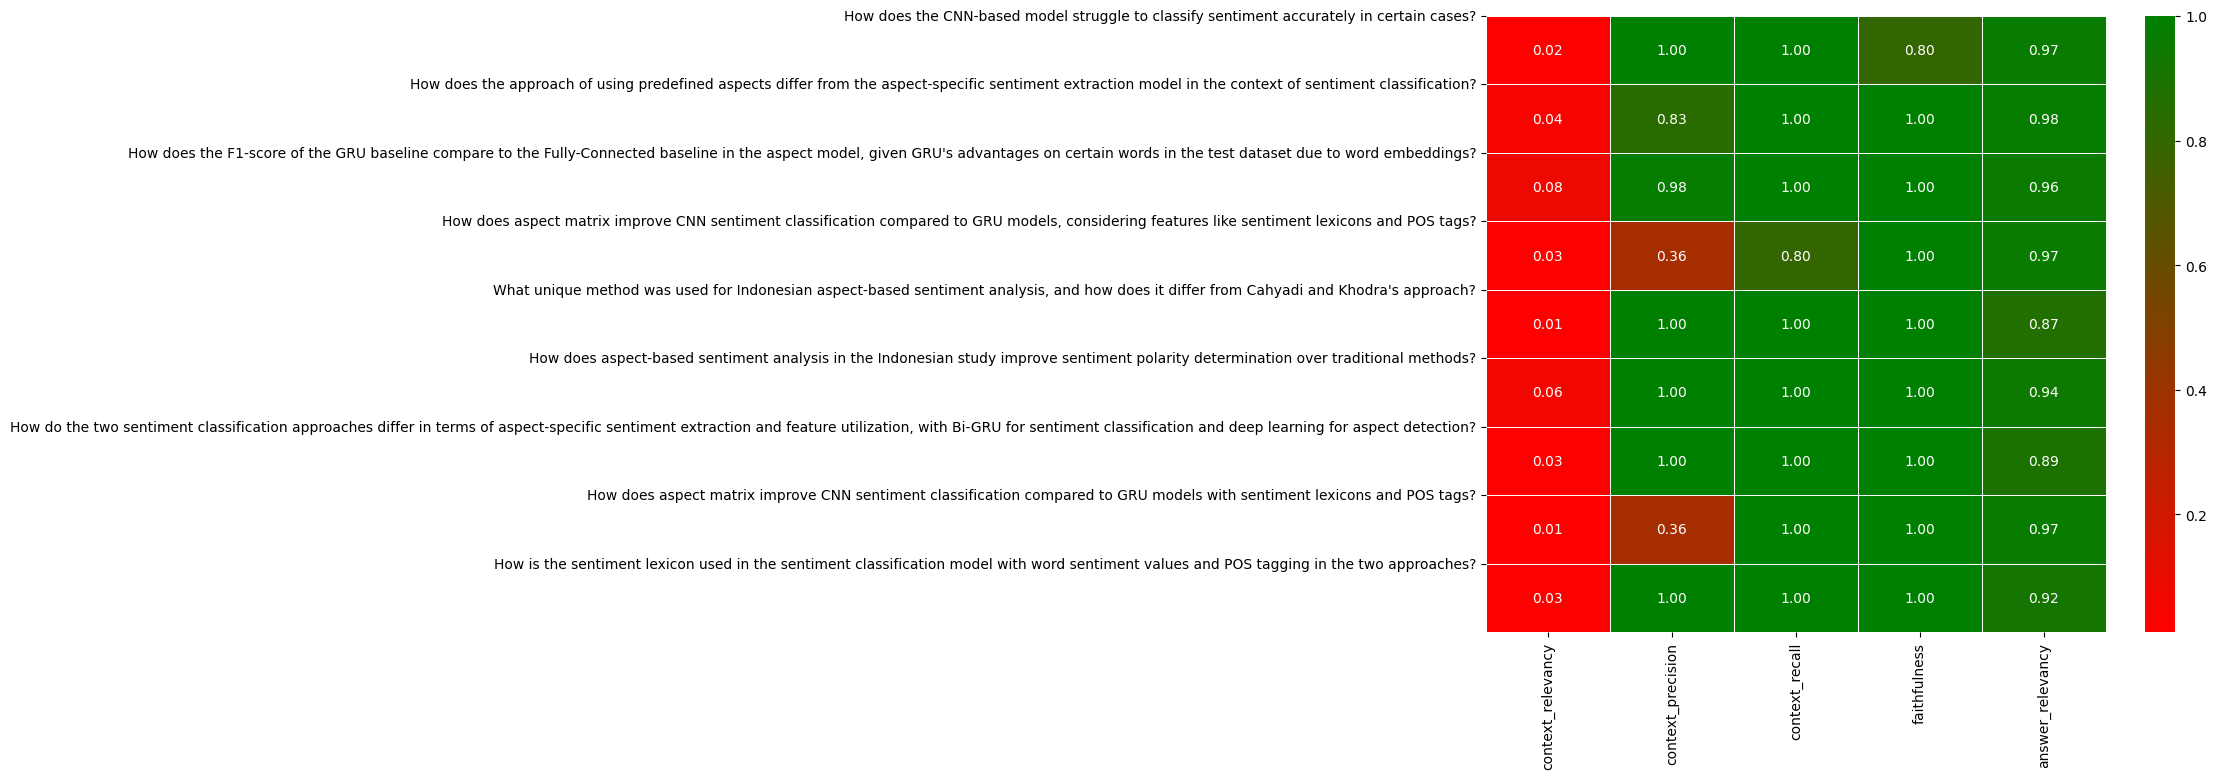

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# only use if not reading saved csv

# df = result.to_pandas()

heatmap_data = df[['context_relevancy', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']]

cmap = LinearSegmentedColormap.from_list('green_red', ['red', 'green'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)

plt.yticks(ticks=range(len(df['question'])), labels=df['question'], rotation=0)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
